# 2주차: Decision Tree

와인 데이터를 이용해서 Decision Tree 모델 실습

## 라이브러리

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## 데이터 로드

In [2]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [3]:
red_wine['color'] = 1.
white_wine['color'] = 0.

data = pd.concat([red_wine, white_wine])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0


### 와인 데이터셋 컬럼 설명

*   `fixed acidity`: 고정 산도 (와인의 신맛에 영향)
*   `volatile acidity`: 휘발성 산도 (높으면 식초와 같은 신맛이 강해짐)
*   `citric acid`: 시트르산 함량 (신선한 신맛을 더함)
*   `residual sugar`: 잔류 당분 (와인의 단맛을 결정)
*   `chlorides`: 염화물 함량 (와인의 짠맛에 영향)
*   `free sulfur dioxide`: 자유 이산화황 (산화 및 미생물 번식 방지)
*   `total sulfur dioxide`: 총 이산화황 (첨가된 총 이산화황의 양)
*   `density`: 밀도 (당분과 알코올 함량에 영향)
*   `pH`: pH (와인의 산성도, 낮을수록 산성)
*   `sulphates`: 황산염 함량 (쓴맛과 항산화 작용)
*   `alcohol`: 알코올 함량 (와인의 도수)
*   `quality`: 품질 점수 (높을수록 좋은 품질)
*   `color`: 와인의 색깔 (레드 와인/화이트 와인 구분)

In [5]:
# describe() 메서드 사용
description = data.describe()
print(description)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

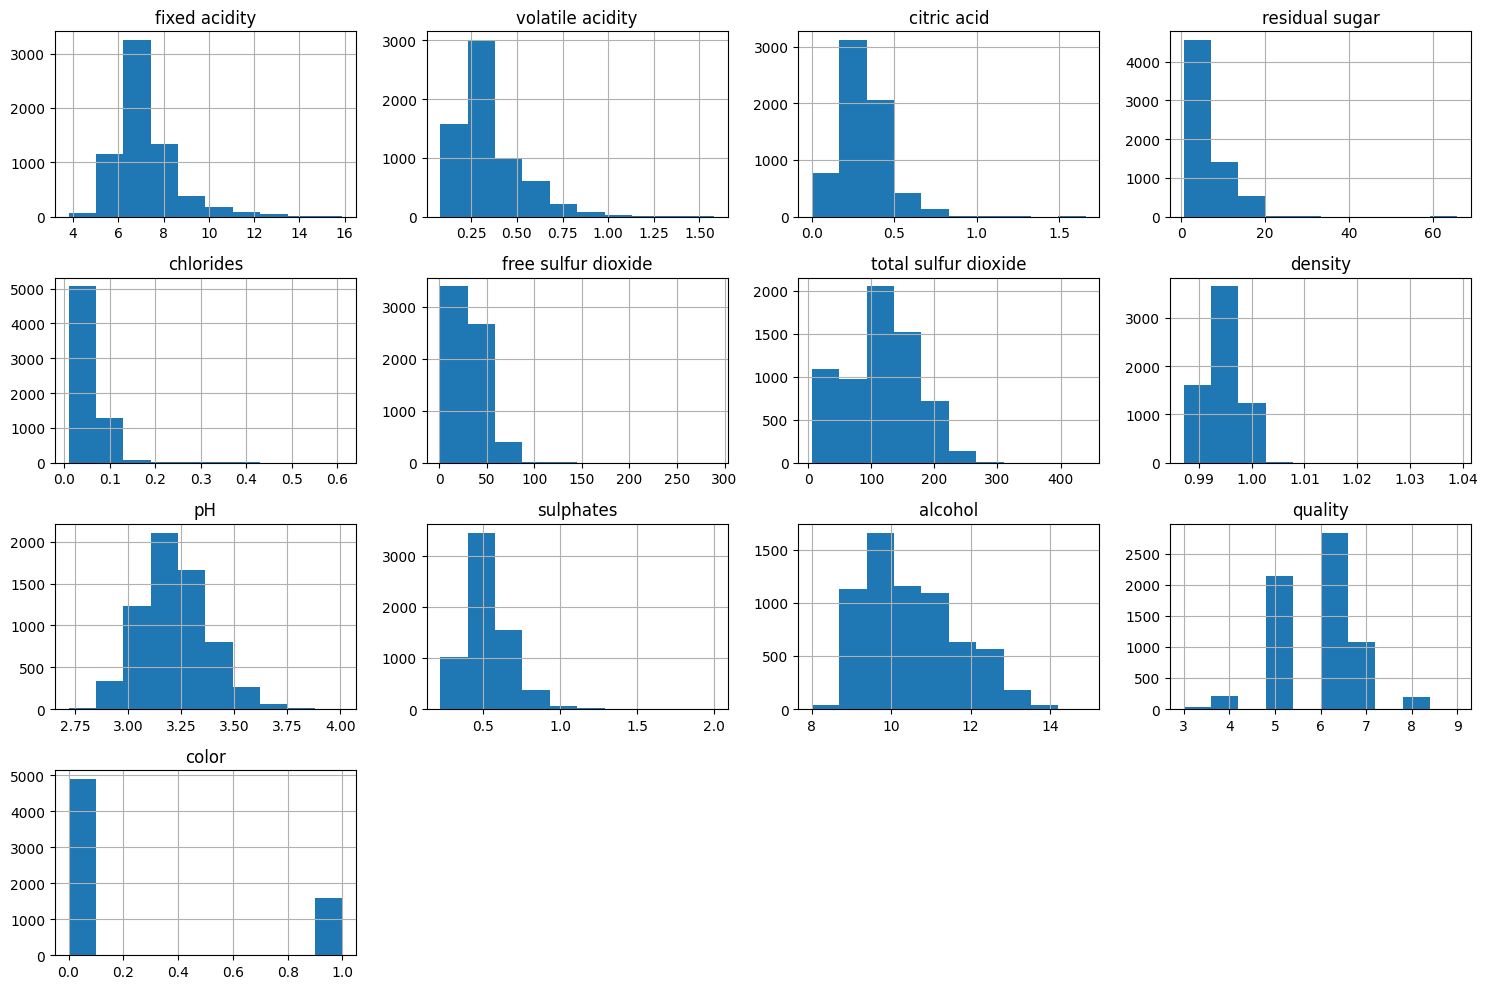

In [6]:
# Histogram (각 컬럼별로 subplot 생성)
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

## Decision Tree 기본

In [7]:
data['quality_group'] = pd.qcut(data['quality'], 3, labels=[0, 1, 2])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,quality_group
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0,2


In [8]:
# 데이터 분할
X = data.drop(['quality', 'quality_group'], axis=1)
y = data['quality_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 1. 기본적인 DecisionTree 학습, 트리 시각화, 테스트 정확도
dt_basic = DecisionTreeClassifier()
dt_basic.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred_basic = dt_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)

In [11]:
print("기본 DecisionTree 테스트 정확도:", accuracy_basic)

기본 DecisionTree 테스트 정확도: 0.63


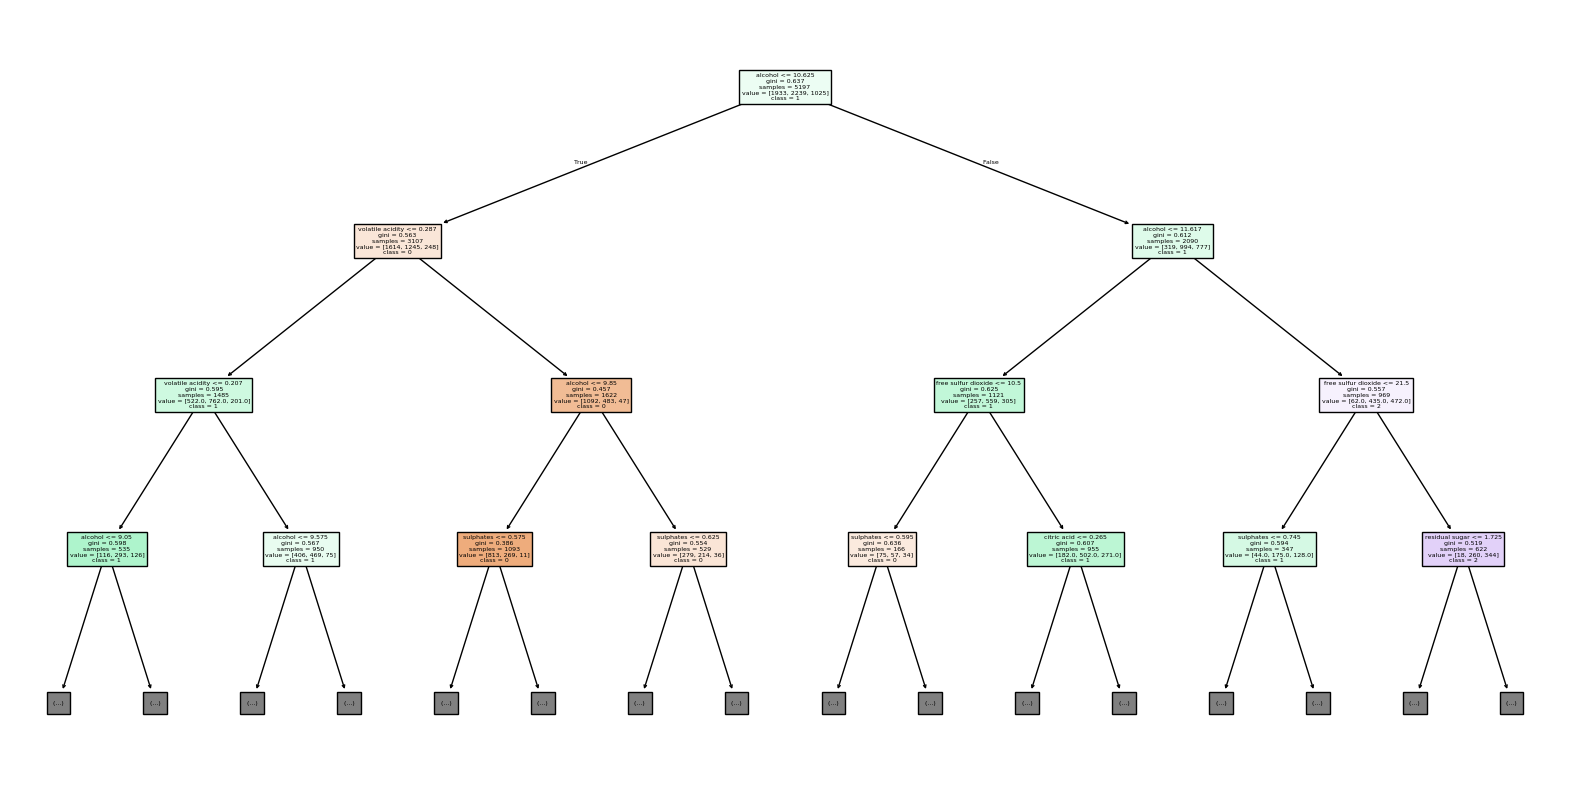

In [12]:
plt.figure(figsize=(20, 10)) # plot 크기 조절
plot_tree(dt_basic, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), max_depth=3) # class_names 추가 및 max_depth 제한
plt.show()

## 노드 수에 따른 정확도 변화

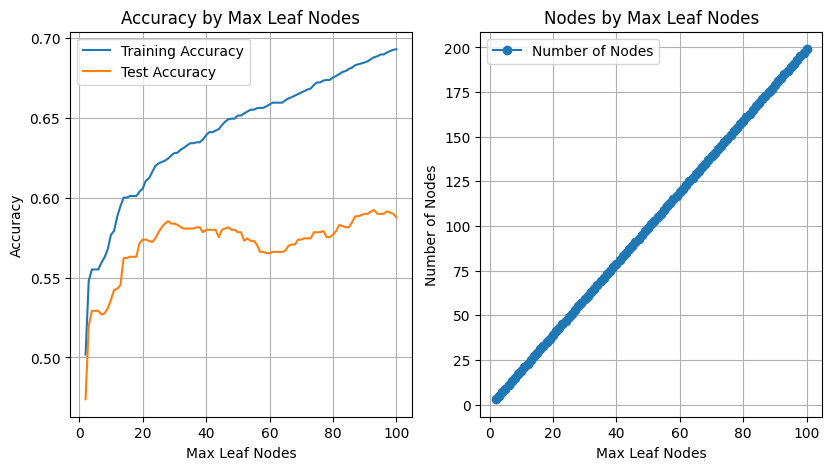

In [13]:
# 2. max_leaf_nodes 조절에 따른 정확도 및 노드 수 변화
train_accuracies = []
test_accuracies = []
node_counts = []
leaf_nodes = range(2, 101, 1)

for leaf in leaf_nodes:
    dt = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    test_accuracies.append(accuracy_score(y_test, y_pred_test))
    node_counts.append(dt.tree_.node_count)

# 그래프 그리기
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(leaf_nodes, train_accuracies, label='Training Accuracy')
plt.plot(leaf_nodes, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy by Max Leaf Nodes')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(leaf_nodes, node_counts, marker='o', linestyle='-', label='Number of Nodes')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Number of Nodes')
plt.title('Nodes by Max Leaf Nodes')
plt.legend()
plt.grid(True)

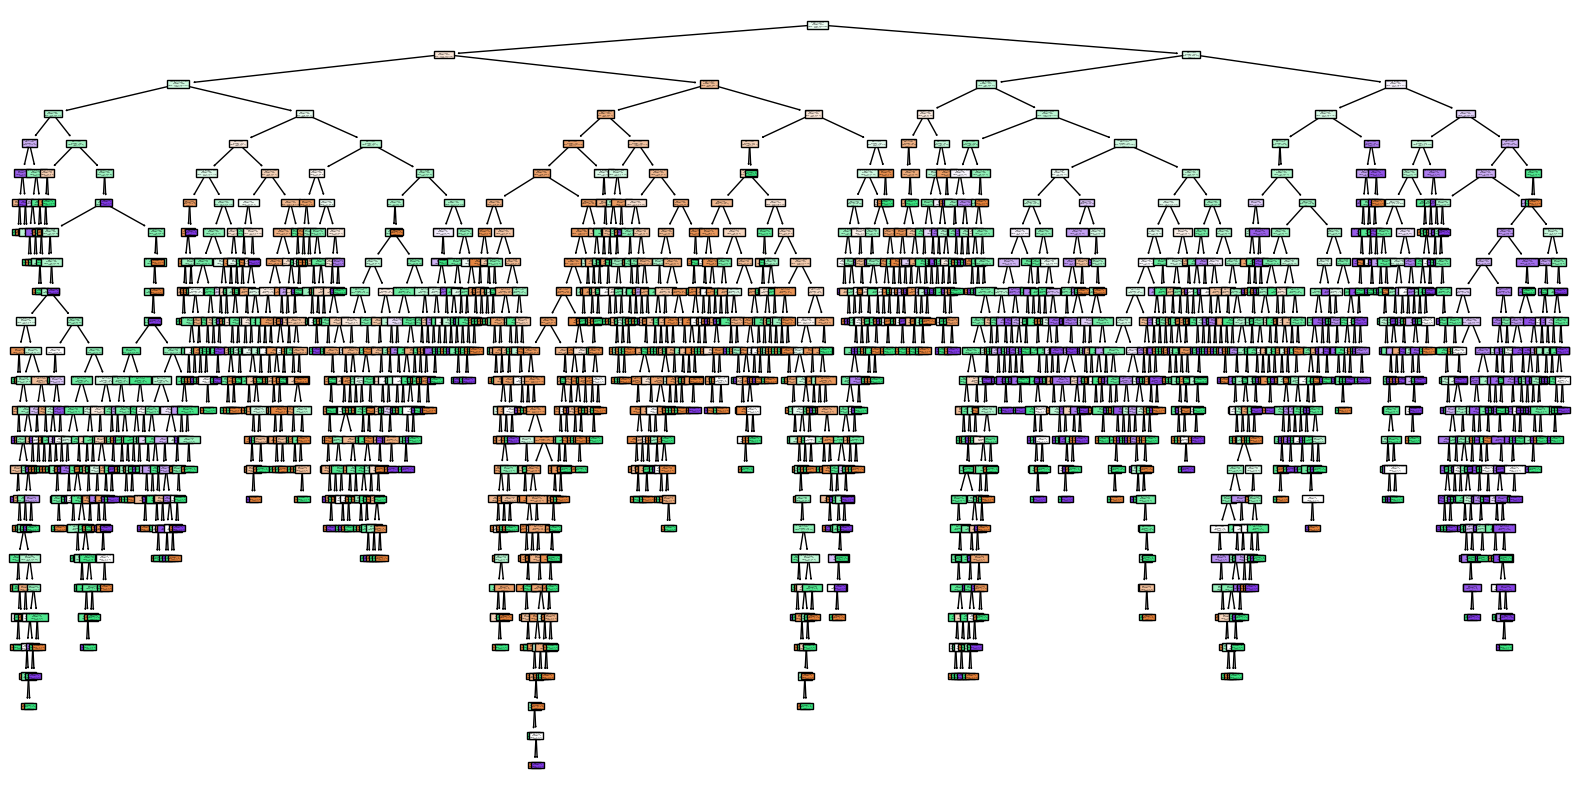

In [14]:
plt.figure(figsize=(20, 10)) # plot 크기 조절
plot_tree(dt_basic, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.show()

## 하이퍼 파라미터

In [15]:
# 데이터 분할
X = data.drop(['color', 'quality_group'], axis=1)
y = data['color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
dt_basic = DecisionTreeClassifier()
dt_basic.fit(X_train, y_train)

y_pred_basic = dt_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)

print("기본 DecisionTree 테스트 정확도:", accuracy_basic)

기본 DecisionTree 테스트 정확도: 0.9830769230769231


최적 하이퍼 파라미터: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
최적 하이퍼 파라미터의 정확도: 0.9859539498038055
최적 모델의 테스트 정확도: 0.9823076923076923


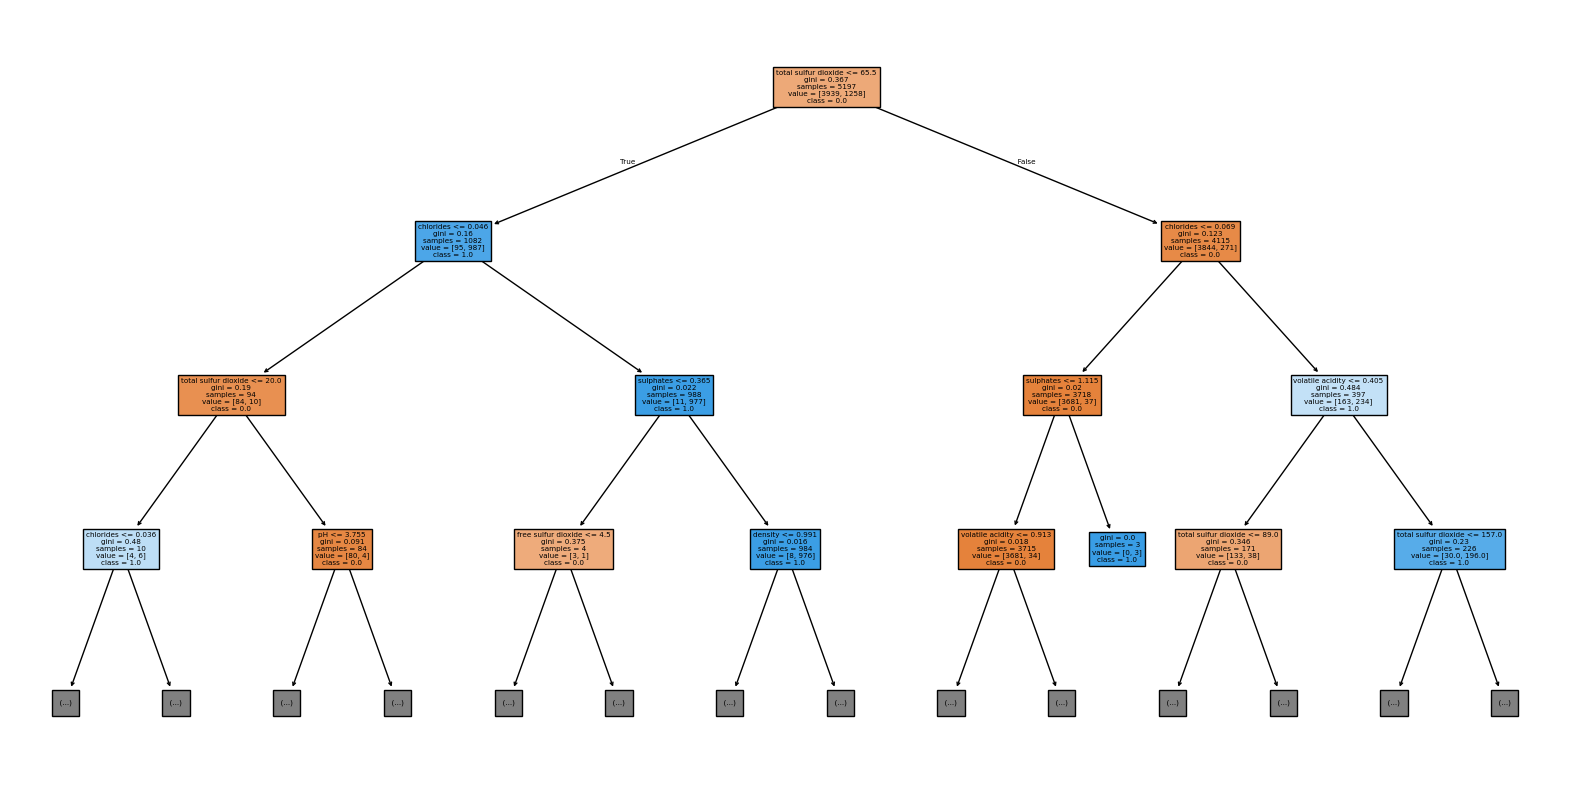

In [17]:
# 3. GridSearchCV로 최적의 하이퍼 파라미터 서치 후 트리 시각화, 정확도 확인
param_grid = {
    # 시간이 넘 많이 걸려서 주석 처리했습니다 ..!
    'max_depth': range(3, 21, 2),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 6, 2),
    # 'max_leaf_nodes': range(10, 101, 5),
    # 'criterion': ['gini', 'entropy'],
    # 'splitter': ['best', 'random']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("최적 하이퍼 파라미터:", grid_search.best_params_)
print("최적 하이퍼 파라미터의 정확도:", grid_search.best_score_)

best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("최적 모델의 테스트 정확도:", accuracy_best)

plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), max_depth=3)
plt.show()

# 과제

자동차 평가 데이터 베이스를 이용한 Decision Tree 실습

Bohanec, M. (1988). Car Evaluation [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5JP48.

In [18]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

In [41]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [21]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


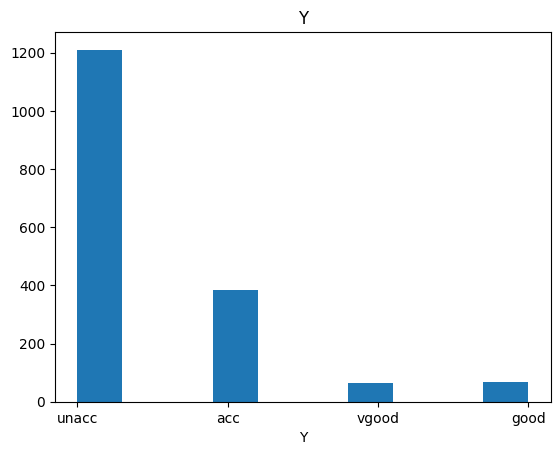

In [22]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.xlabel('Y')
plt.title('Y')
plt.show()

## 데이터셋 컬럼 설명

*   `buying`: 구매 가격
*   `maint`: 유지 보수 비용
*   `doors`: 문의 개수
*   `persons`: 탑승 가능 인원 수
*   `lug_boot`: 수납 공간 크기
*   `safety`: 안전 등급

## 1. Decision Tree 기본으로 성능 확인

In [28]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [51]:
# TODO: 데이터를 트레인 데이터와 테스트 데이터로 나눈 뒤 Decision Tree에 학습시켜서 테스트 데이터 정확도가 얼마나 나오는지 확인
# Tip: X값이 범주형일 경우 수치형으로 인코딩을 해줘야 합니다.
# X 범주형 데이터인 경우 수치형으로 인코딩하기
# y도 인코딩이 필요함

In [34]:
X.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,vhigh,vhigh,2,2,small,low
freq,432,432,432,576,576,576


In [42]:
print(X['buying'].value_counts())
# nominal 변수보다는 ordinal 변수라고 판단, label encoding 으로
# 이때 low 일수록 값이 작고, high 일 수록 값이 크도록
X = X.copy() 
X.loc[X['buying']=='vhigh','buying']=3
X.loc[X['buying']=='high','buying']=2
X.loc[X['buying']=='med','buying']=1
X.loc[X['buying']=='low','buying']=0

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


In [43]:
print(X['buying'].value_counts())

buying
3    432
2    432
1    432
0    432
Name: count, dtype: int64


In [46]:
print(X['maint'].value_counts())
# 마찬가지로, ordinal 한 범주형 변수이기 때문에 크기를 고려해서 label encoding
X.loc[X['maint']=='vhigh','maint']=3
X.loc[X['maint']=='high','maint']=2
X.loc[X['maint']=='med','maint']=1
X.loc[X['maint']=='low','maint']=0

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


In [47]:
print(X['maint'].value_counts())

maint
3    432
2    432
1    432
0    432
Name: count, dtype: int64


In [49]:
print(X['doors'].value_counts())
# 5more은 5로
X.loc[X['doors']=='5more','doors']='5'
# 나머지 수치형으로 변환
X['doors'] = pd.to_numeric(X['doors'])

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64


In [50]:
print(X['doors'].value_counts())

doors
2    432
3    432
4    432
5    432
Name: count, dtype: int64


In [53]:
print(X['persons'].value_counts())
# more은 6으로
X.loc[X['persons']=='more','persons']='6'
# 나머지 수치형으로 변환
X['persons']=pd.to_numeric(X['persons'])

persons
2       576
4       576
more    576
Name: count, dtype: int64


In [54]:
print(X['persons'].value_counts())

persons
2    576
4    576
6    576
Name: count, dtype: int64


In [56]:
print(X['lug_boot'].value_counts())
# ordinal 변수임을 고려해서, label encoding, 이때 크기 고려
X.loc[X['lug_boot']=='big','lug_boot']=2
X.loc[X['lug_boot']=='med','lug_boot']=1
X.loc[X['lug_boot']=='small','lug_boot']=0

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64


In [58]:
print(X['safety'].value_counts())
# 마찬가지로, ordinal 변수임을 고려해서, label encoding, 이때 크기 고려
X.loc[X['safety']=='high','safety']=2
X.loc[X['safety']=='med','safety']=1
X.loc[X['safety']=='low','safety']=0

safety
low     576
med     576
high    576
Name: count, dtype: int64


In [63]:
obj_col=X.select_dtypes(include=['object']).columns.tolist()
X[obj_col] = X[obj_col].apply(pd.to_numeric)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,0,0
1,3,3,2,2,0,1
2,3,3,2,2,0,2
3,3,3,2,2,1,0
4,3,3,2,2,1,1


In [68]:
# y Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [73]:
y=pd.Series(y)
y.value_counts()

2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [80]:
# y의 비율을 맞춰 train test data split 진행
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size=0.35, random_state=0)

## 2. 최적의 하이퍼파라미터 성능 내보기

In [81]:
# TODO: 데이터에 알맞는 Decision Tree의 최적의 하이퍼 파라미터를 GridSearch를 통해 찾아보고 테스트 데이터 정확도 출력
# GridSearch 로 최적의 하이퍼파라미터 조합 찾기
param_grid = {
    'criterion': ['gini', 'entropy'],        # 분할 기준
    'max_depth': [None, 3, 5, 10],          # 최대 깊이
    'min_samples_split': [2, 5, 10],        # 분할에 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],          # 리프 노드의 최소 샘플 수
}
dt = DecisionTreeClassifier(random_state=0)
# 이때 성능은 정확도로 확인
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters Set", grid_search.best_params_)

# 테스트 데이터 정확도 출력
best_model = grid_search.best_estimator_  # 최적의 조합에서 돌려보았을 때
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy", accuracy)

Best Hyperparameters Set {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy 0.9619834710743802


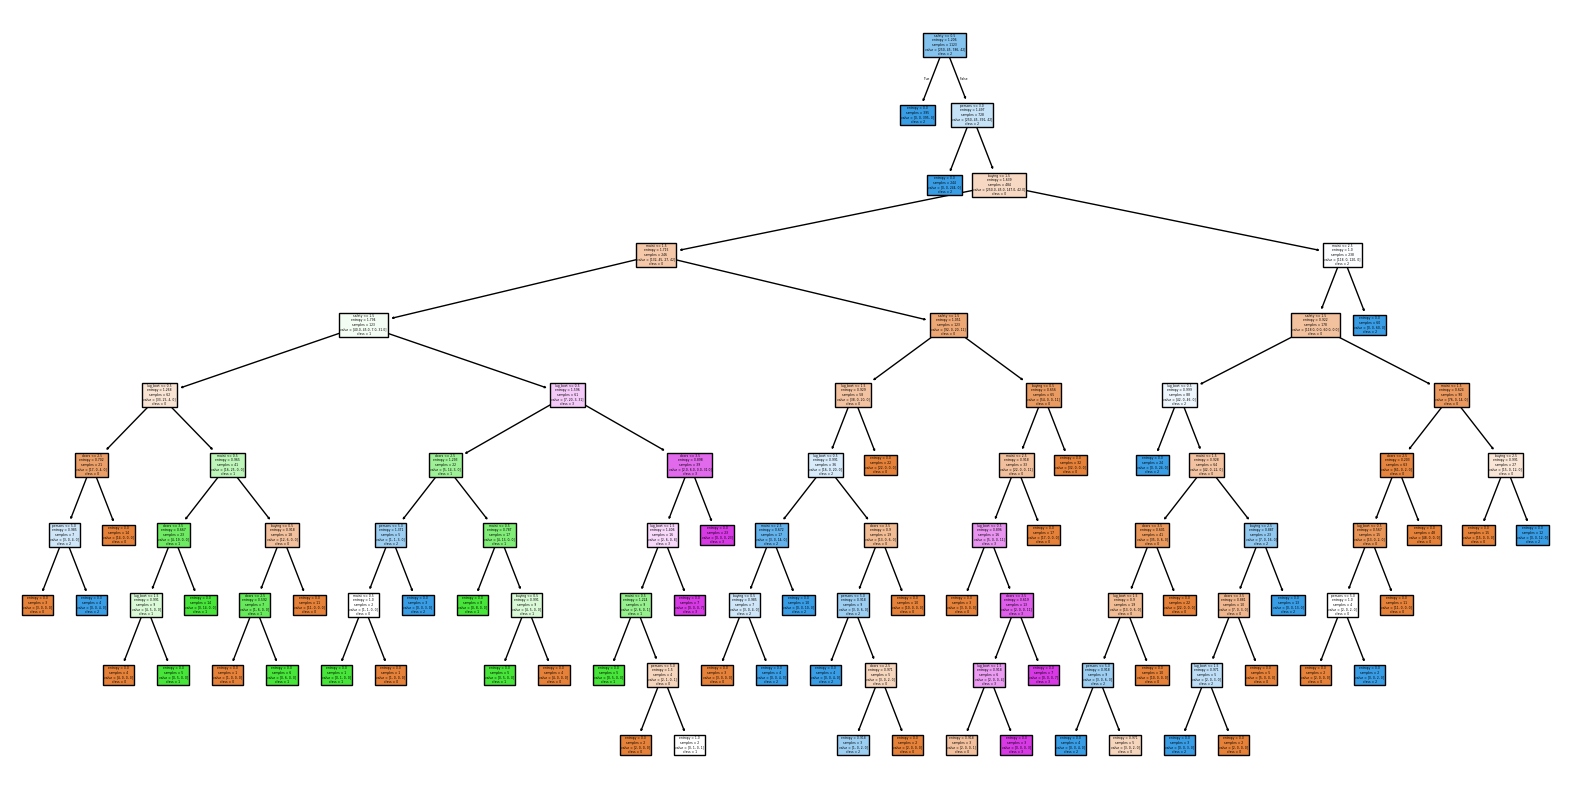

In [84]:
# 시각화 해보기
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), max_depth=10)
plt.show()

## 3. 다른 앙상블 모델 사용해보기

In [92]:
# TODO: Decision Tree가 아닌 다른 앙상블 모델에 훈련 데이터를 학습시켜서 테스트 데이터 정확도 확인
import warnings
warnings.filterwarnings('ignore')

**Light GBM**

In [108]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=0,
                            class_weight='balanced', verbose=-1,
                            max_depth=10, num_leaves=31, min_child_samples=5, min_split_gain=0.001, reg_alpha=0.1, reg_lambda=0.1)              
lgbm_model.fit(X_train, y_train)
lgbm_y_pred = lgbm_model.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_y_pred)
print("LightGBM Test Accuracy", lgbm_accuracy)

LightGBM Test Accuracy 0.9884297520661157


**XGBoost**

In [114]:
from xgboost import XGBClassifier
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
}
xgb_model = XGBClassifier(random_state=0,class_weight='balanced', verbose=-1,
                            max_depth=10, num_leaves=31, min_child_samples=5)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("XGBoost Test Accuracy", xgb_accuracy)

XGBoost Test Accuracy 0.9900826446280991


## 최종 분석

1. 선택한 앙상블 모델에 대한 간단한 설명

    **LightGBM**
- Bagging 모델 중 하나로 독립적인 tree에서 각 학습을 수행한 뒤, 다수결 Voting 또는 평균을 통해 최종 예측값을 냄
- 이때 주어진 데이터와 같은 크기로 복원 추출해 데이터를 만드는 방식인 Bootstrap 을 통해 각 tree에 input data로 넣어주는데, 이때 결국 같은 데이터로 학습하기 때문에 tree간 correlation이 높아질 수 있다는 점을 고려해서 OutOfBag로 데이터의 약 63% 정도만 Bootstrap Sample로 뽑아 학습을 진행  

    **XGBoost**
- Boosting 모델 중 하나로 Bagging과 달리 tree에서 오분류된 데이터에 가중치를 곱하여 다음 tree의 input으로 순차적인 학습을 진행함
- 이때 각 tree의 가중치의 합으로 최종 예측 결과를 냄, 분류의 경우 각 tree의 예측 확률을 합산하여 최종 예측을 결정



3. 3가지 실행 정확도 결과에 대한 비교 분석
- Decision Tree의 정확도는 약 0.962. LightGBM의 정확도는 약 0.988, XGBoost의 정확도는 약 0.99로 XGBoost의 성능이 가장 좋음
- LightGBM 하이퍼파라미터 reg_alpha, reg_lambda 조정으로 정규화를 했지만, 기본적으로 트리를 깊게 확장하기 때문에 과적합 가능성이 높음
- XGBoost는 정규화 기법을 포함하고 colsample_bytree로 피쳐를 샘플링해 불필요한 피처를 배제하여 과적합 방지함
- 따라서 위와 같이 데이터의 크기가 상대적으로 작을 경우, XGBoost의 일반화 성능이 더 뛰어날 수 있음 